# 6. Transformers via Hugging Face

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia2.giphy.com%2Fmedia%2FTw0rSdQs4fbJC%2Fgiphy.gif&f=1&nofb=1&ipt=f07b4382bc4ac4352b1ae008a847fca249f95f46816f6427add49ed63c1b0062&ipo=images)

- Es una arquitectura alternativa a redes recurrentes y convolucionales
- Introducida en 2017 en el paper [*Attention Is All You Need*](https://arxiv.org/abs/1706.03762) donde el enfoque principal fue el de traducción automática
- Esta arquitectura influenció una gran cantidad de modelos. Podemos agruparlos en los siguientes:
    - **GPT-like**, tambien llamados modelos *autoregresivos*
    - **BERT-like**, tambien llamados modelos *auto-encoding*
    - **BART/T5-like**, tambien llamados modelos *seq-to-seq*


![](https://miro.medium.com/v2/resize:fit:1358/1*tZNNGXekIBmuoXd4si0oqQ@2x.jpeg)
> Tomada de [Yang et al, 2023](https://arxiv.org/abs/2304.13712)

## Los transformers son modelos del lenguaje

- Todos estos modelos fueron entrenados como modelos del lenguaje:
    - De forma self-supervised
    - Precisa grandes cantidades de textos crudos para el entrenamiento
- Los modelos adquieren un "entendimiento" estadístico del lenguaje
    - Esto no los hace particularmente útiles para tareas específicas
    - Por esto, una vez que se tiene un modelo pre-entrenado pasa por un proceso de *transfer learning*

### El problema de los transformers: Son ENORMES

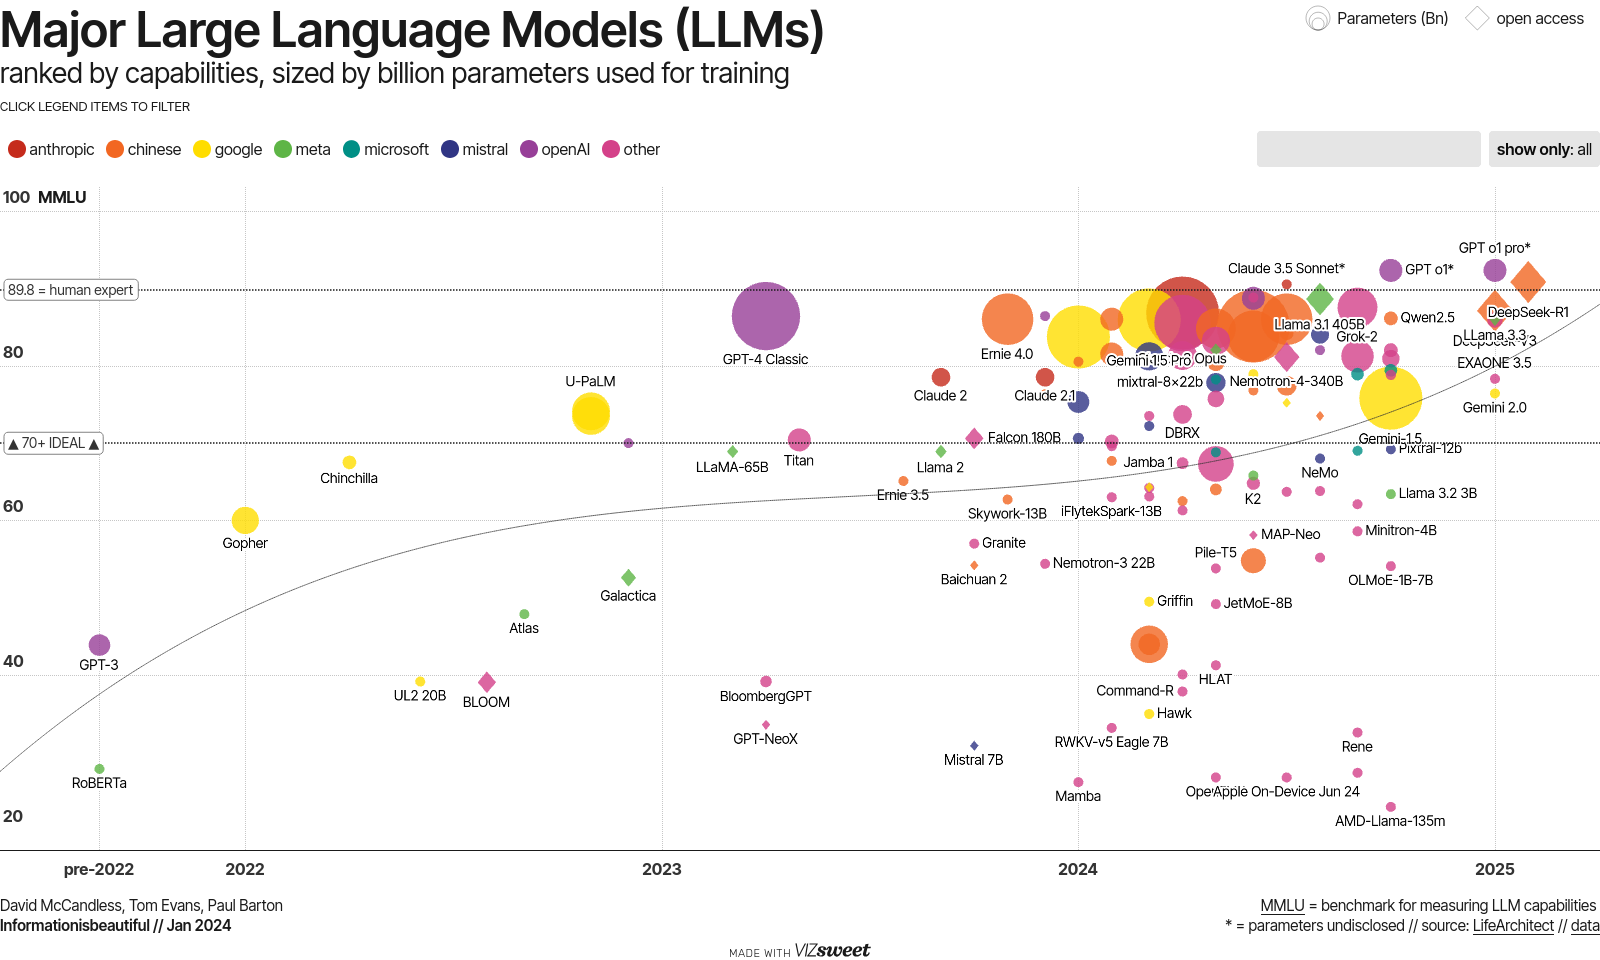

> Tomada de [Information if beautiful](https://informationisbeautiful.net/visualizations/the-rise-of-generative-ai-large-language-models-llms-like-chatgpt/)

- La estrategia que se ha adoptado es aumentar el tamaño del modelo asi como la cantidad de datos con los que se entrena.
- Entrenarlos no es sencillo, requiere muchos datos, dinero y cómputo
- Tienen un [impacto ambiental considerable](https://www.youtube.com/watch?v=ftWlj4FBHTg)
- Compartir los modelos es una forma de reducir tiempo, costos e impacto ambiental
    - [Hugging Face](https://huggingface.co/)
    - https://paperswithcode.com/
    - https://www.kaggle.com/models
- Otra solución sería no usarlos *at all* :p

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("ftWlj4FBHTg", width=800, height=450)

#### Herramientas para evaluar el impacto ambiental de modelos

- https://mlco2.github.io/impact/
- https://codecarbon.io/

![](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/carbon_footprint.svg)

#### *fine-tuning*

Pre-entrenar un modelo implica entrenar un modelo desde cero. Esto es, los pesos se inicializan de forma aleatoria y se entrena con muchos datos, tiempo y cómputo

En contraste, realizar *fine-tuning*, implica realizar entrenamiento **despúes** de que un modelo haya sido entrenado. En este proceso se utilizan datos anotados por humanos (aprendizaje supervisado) específicos para una tarea sobre un modelo pre-entrenado.

Por ejemplo, si se tiene un modelo entrenado con un gran corpus en español se puede realizar el *fine-tuning* con un corpus de textos científicos con lo que obtendremos un modelo especializado en *science/research*

#### ❓ Por qué no entrenar el modelo desde el inicio para hacer *science/research*?

- El *fine-tuning* en general es más rápido, barato y en términos ambientales más eficiente (en comparación con el pre-entrenamiento de un gran modelo del lenguaje)
- En general se tendrán mejores resultados que entrenar desde 0 (a menos que tengas mucho poder de computo, dinero y datos)


**NOTA:** Si bien este proceso es mucho más barato con respecto a pre-entrenar un modelo, en términos absolutos, sigue siendo muy costo

### Arquitectura

Tenemos dos bloques principales, *Encoder* y *Decoder*:
- *Encoder*: Recibe el *input* y genera una representación
- *Decorder*: Usa la representación generada por el *encoder* junto con otras representaciones para generar la secuencia objetivo.

![](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/transformers.svg)

Cada parte del transformer puede ser utilizado independientemente con base en la tarea a resolver:

- Solo encoder: Tareas que precisan entendimiento del input como clasificadores o *NER*
- Solo decoder: Tareas que realizan generación de texto
- Encoder-decoder (seq2seq transformers): Tareas de generación de texto que requiere el input como traducción automática o resumen automático

## Atención

- Es un componente crucial que consiste en son capas especiales llamadas *attention layers*
- A grosso modo, esta capa le dirá al modelo como prestar atención solo a algunas partes de la oración cuando se crea la representación vectorial de cada palabra
  - En el ejemplo "it" hace alusión a "animal" por lo que se tiene que poner más atención a esa sección de la oración
- Tiene sentido ya que las palabras por si mismas significan algo que está fuertemente atado al contexto


![](https://jalammar.github.io/images/t/transformer_self-attention_visualization.png)

> Tomada de [Illustated Transformer](https://jalammar.github.io/illustrated-transformer/)

### Código

In [ ]:
!pip install transformers
!pip install datasets
!pip install evaluate
!pip install hf_xet

### Opcional pero recomendable

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

## ¿Qué pueden hacer los *transformers*?

- Modelos chiquitos - https://huggingface.co/distilbert

Los transformers son muy versatiles y se han utilizado para resolver toda clase de tareas. Estos son algunos ejemplos de tareas de *NLP* que han tratado de resolver

Usaremos la API de *HuggingFace* atraves de la función `pipeline()` para exploración. Esta función es *out-of-the-box* ya que realiza el preprocesamiento, inferencia y posprocesamiento permitiendo que introduzcamos texto "crudo".


In [ ]:
import transformers
from transformers import pipeline
from rich import print as rprint

transformers.logging.set_verbosity_error()

#### Clasificación

In [ ]:
classifier = pipeline("sentiment-analysis")
rprint(classifier(["i think this is amazing", "my bag is awful", "i want pizza"]))

Automáticamente seleccionará algun modelo para resolver la tarea (en inglés). Se pueden ver las tareas disponibles en la documentación con `pipeline?` o en la [documentación de HF](https://huggingface.co/docs/transformers/task_summary)

In [ ]:
pipeline?

#### Generación de texto

In [ ]:
generator = pipeline("text-generation")
rprint(generator("What I learned in boating school is"))

**NOTA:** Se puede pasar el parámetro `model=` para utilizar cualquier modelo del [*Hub*](https://huggingface.co/models) adecuado para la tarea. Se pueden utilizar varios parámetros para personalizar la inferencia

In [ ]:
spa_gen = pipeline("text-generation", model="mrm8488/spanish-gpt2", max_length=100, )
rprint(spa_gen("La inteligencia artificial es"))

#### Question answering

In [ ]:
question_answerer = pipeline("question-answering")
rprint(question_answerer(
    question="What is the course about?",
    context="I think that this course on Computer Linguistic was life changing stuff!!!",
))

#### Named Entity Recognition

In [ ]:
ner = pipeline("token-classification", aggregation_strategy="simple")
rprint(ner("My name is Diego and I live on Mexico City. I work at Comunidad Elotl doing free software development and I teach a course at Universidad Nacional Autonoma de Mexico."))

#### Resumen automático

In [ ]:
text = """
A fixed-gear bicycle or fixie is a bicycle that has a drivetrain with no freewheel mechanism, meaning the pedals always spin together with the rear wheel. The freewheel was developed early in the history of bicycle design but the fixed-gear bicycle remained the standard track racing design. More recently the "fixie" has become a popular alternative among mainly urban cyclists, offering the advantage of simplicity compared with the standard multi-geared bicycle.

Most bicycle hubs incorporate a freewheel to allow the pedals to remain stationary while the bicycle is in motion, so that the rider can coast, i.e., ride without pedalling using forward momentum. A fixed-gear drivetrain has the drive sprocket (or cog) threaded or bolted directly to the hub of the back wheel, so that the pedals are directly coupled to the wheel. During acceleration, the pedal crank drives the wheel, but in other situations, the rear wheel can drive the pedal cranks.[2] This direct coupling allows a cyclist to apply a braking force with the legs and bodyweight, by resisting the rotation of the cranks. It also makes it possible to cycle backwards.

As a general rule, fixed-gear bicycles are single-speed. A derailleur for gear selection would introduce chain slack, which would interfere with braking. Gear selection can, however, be accomplished with the use of an internally geared hub. For example, a Sturmey-Archer fixed-gear three-speed hub is a fixed-gear multi-speed arrangement. Most fixed-gear bicycles only have a front brake, and some have no brake.
"""
summarizer = pipeline(task="summarization")
rprint(summarizer(text))

#### Traducción

In [ ]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-es-en")
rprint(translator("Las ideas incoloras duermen furiosamente"))

#### Zero shot classification

En este caso la tarea de clasificación es un poco más complicada ya que el texto no ha sido previamente etiquetado. Se deberá elegir de un conjunto de etiquetas candidatas definidas fuera del modelo pre-entrenado.

Se le llama *zero-shot* porque no es necesario realizar *fine-tune* en nuestros propios datos para que el modelo sea útil.

In [ ]:
classifier = pipeline("zero-shot-classification")
rprint(classifier(
    "This is a course about the Computer Linguistics an Natural Language Processing",
    candidate_labels=["education", "politics", "business"],
))

## ¿Qué hay detras de `pipeline()`?


Como vimos la función `pipeline()` es *out-of-the-box*. Vamos a replicar lo que está pasando debajo del capo. Esto incluye el *tokenizer*, la inferencia del modelo y el posprocesamiento.

![](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/full_nlp_pipeline.svg)

In [ ]:
raw_inputs = [
    "I think my bike is awesome",
    "I hate when you talk like goofy :("
]

In [ ]:
classifier = pipeline("sentiment-analysis")
rprint(classifier(raw_inputs))

Vamos a desmenuzar esto suavecito. Vemos que en el `pipeline()` hay tres elementos importantes:

- Preprocesamiento
- Modelo

- Posprocesamiento

### 1. Preprocesamiento y tokenización

- Tokenización
- Mapeo de tokens a números
- Agregar elemento que sean útiles al modelo

Estos pasos deben ser **exactamente los mismos** que los del modelo pre-entrenado. Para obtener esta información utilizaremos `AutoTokeninzer`

In [ ]:
from transformers import AutoTokenizer

# El modelo por defecto para la tarea de análisis de sentimientos
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
inputs = tokenizer(raw_inputs, padding=True, truncation=False, return_tensors="pt")
# Diccionario listo para ser introducido al modelo
rprint(inputs)

Los transformers solo aceptan tensores como entrada. Para modificar el tipo de tensor usamos `return_tensors=`. De momento no nos preocupemos por `padding=` o `truncation=`

#### Tokenizers

Recordemos que hay varios tipos de tokenizadores:

- Word base
- Character base
- Subword tokenizers

Cargar y guardar tokenizadores puede realizarse mediante los métodos `from_pretrained` y `save_pretrained` respectivamente.

In [ ]:
tokenizer.save_pretrained("my_tokenizer")

In [ ]:
!ls my_tokenizer

#### Encoding tokenization

Convertir los token a números es conocido como un proceso de *encoding* (NO confundir con *encoders* de los transformers) y consta de dos pasos:

1. Tokenizar
2. Mapear los tokens a números únicos (*ids*).

Hay varios métodos para obtener los tokens por lo que es importante utilizar el **mismo método** de tokenizado con el que fue entrenado el modelo que queramos utilizar.

In [ ]:
sentence = raw_inputs[0] + " like tokenizers and automatization"
tokens = tokenizer.tokenize(sentence)
rprint(tokens)

Para mapear de tokens a números se necesita el vocabulario (*vocab.txt*). Es importante tener el mismo vocabulario con el que el modelo fue creado.

In [ ]:
ids = tokenizer.convert_tokens_to_ids(tokens)
rprint(ids)

#### Decoding tokenization

Decodificar es tomar los ids y pasarlos a su representación textual. Notemos que además de pasar a texto mergeamos los subwords

In [ ]:
decoded_string = tokenizer.decode(ids)
rprint(decoded_string)

### 2. El Modelo

Asi como obtuvimos el tokenizador podemos obtener el modelo con el que queramos trabajar. Para ello usaremos `AutoModel`

In [ ]:
from transformers import AutoModel

# Mismo modelo por defecto para análisis de sentimientos
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

El modelo nos regresará los estados ocultos (*hidden states*) que será la representación **contextual** del texto de entrada. En general son vectores de dimensión alta.

La salida contendrá:

- **Batch size:** Oraciones procesadas
- **Sequence length:** Longitud de la representación númerica de las oraciones
- **Hidden size:** La dimensión del vector para cada input del modelo

In [ ]:
outputs = model(**inputs)
rprint(outputs)

In [ ]:
# 768 como hidden size es para modelos chiquitos.
# Los grandes pueden tener 3072 o más
rprint(outputs.last_hidden_state.shape)

#### Cabezas del modelo

El modelo toma el vector de la última *hidden state* como entrada y la proyecta a una dimensión diferente.

![](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/transformer_and_head.svg)

Dependiendo de la tarea a resolver cambiará la capa de *Head*. Hay muchas arquitecturas disponibles en 🤗 cada una enfocada en resolver una tarea específica. Estas arquitecturas son del estilo:

- `*Model` (Obtiene los *hidden states*)
- `*ForCausalLM`
- `*ForQuestionAnswering`
- `*For<task>`

Siendo más específicos cambiaremos nuestro código para usar `AutoModelForSequenceClassification` en lugar de solo `AutoModel`.

In [ ]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)
rprint(outputs.logits.shape)

Se puede instanciar un modelo para entrenarlo desde cero (aunque ya vimos que no es recomendable por la cantidad de datos y computo necesarios)

In [ ]:
from transformers import BertConfig, BertModel

config = BertConfig()
model = BertModel(config)

rprint(config)

Generalmente obtendremos mejores resultados si cargamos un modelo previamente entrenado

In [ ]:
from transformers import BertModel

bert_model = BertModel.from_pretrained("bert-base-uncased")

Guardar un modelo es sencillo, solo usamos el análogo a `from_pretrained` que es `save_pretrainded`

In [ ]:
bert_model.save_pretrained("my_berto_modelo")

In [ ]:
!ls bert_model

#### Manejando multiples entradas

Los modelos de 🤗 esperan múltiples secuencias o *batches* de entrada. (No confundir con entrenamiento por *batches*).

In [ ]:
import torch

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

test_seq = "Don't you feel that something wrong will happend?"

tokens = tokenizer.tokenize(test_seq)
ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.tensor(ids)
# Esta línea debería fallar
model(input_ids)

In [ ]:
# Envolvemos los ids en un arreglo
input_ids = torch.tensor([ids])

rprint("Inputs", input_ids)
output = model(input_ids)
rprint("Logits", output.logits)

##### Padding

Hasta ahora nuestro modelo realizó una predicción tomando en cuenta un par de oraciones de entrada:

In [ ]:
rprint(raw_inputs)

In [ ]:
rprint(inputs["input_ids"])
rprint(inputs["attention_mask"])

In [ ]:
tokenizer.pad_token_id

¿Qué pasa cuando nuestras oraciones no tienen la misma longitud? Nuestros tensores deben tener una forma rectangular para poder ser creados a partir de un *batch*.

Para ello usamos un *padding* que será de utilidad para lograr tener vectores de forma rectangular

In [ ]:
import torch

another_ids = [
    [200, 200, 200],
    [200, 200]
]
torch.tensor(another_ids)

In [ ]:
another_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id]
]
torch.tensor(another_ids)

Mandamos los ids de nuestras secuencias de forma individual y en batch:

In [ ]:
sequence1_ids = [[200, 200, 200]]
sequence2_ids = [[200, 200]]
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

rprint(model(torch.tensor(sequence1_ids)).logits)
rprint(model(torch.tensor(sequence2_ids)).logits)
rprint(model(torch.tensor(batched_ids)).logits)

##### ❓ No estamos obteniendo el mismo resultado para los *logits* de ambas secuencias ¿Porqué?

- Esto es porque una característica fundamental de los transformes son las capas de atención que **contextualizan** cada token. En ese sentido, las capas de atención toman en cuenta los tokens de padding. Para evitar esto se utilizan las *attention masks*.

##### Attention mask

Las *attention masks* son vectores del mismo tamaño que los vectores de ids con 1's y 0's para indicar que tokens seran tomados en cuenta.

In [ ]:
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

attention_mask = [
    [1, 1, 1],
    [1, 1, 0],
]

outputs = model(torch.tensor(batched_ids), attention_mask=torch.tensor(attention_mask))
rprint(outputs.logits)
rprint(model(torch.tensor(sequence1_ids)).logits)
rprint(model(torch.tensor(sequence2_ids)).logits)

#### Truncation

Los modelos de transformers tienen limitaciones en cuanto a la longitud de la oración se refiere. Muchos modelos solo pueden lidiar con entre 512 y 1024 tokens. Es importante tomar en cuenta esto:

```python
sequence = sequence[:max_sequence_length]
```

Tambien podemos buscar modelos que soporten longitudes mayores

In [ ]:
tokenizer.model_max_length

### 3. Posprocesamiento

In [ ]:
rprint(outputs.logits)

Necesitamos posprocesar estos valores llamados *logits* (scores no normalizados). Para obtener probabilidades necesitamos usar la capa [*SoftMax*](https://en.wikipedia.org/wiki/Softmax_function).

In [ ]:
import torch

logits = outputs.logits
softmax = torch.nn.Softmax(dim=-1)
probs = softmax(logits)
rprint(probs)

In [ ]:
rprint(model.config.id2label)

Con esta información podemos concluir que el modelo asigno las siguientes labels:
1. *NEGATIVE*: 0.00001, *POSITIVE*: 0.99982
2. *NEGATIVE*: 0.99283, *POSITIVE*: 0.00071

Esta sería la reproducción de lo que sucede detrás de la función `pipeline()`.

## Fine-tuneando modelos

Para el fine-tuning usaremos el modelo de `bert-base-uncased`. Podemos encontrar la información del modelo en su [model-card](https://huggingface.co/google-bert/bert-base-uncased)

In [ ]:
checkpoint = "bert-base-uncased"

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model=checkpoint)
rprint(unmasker("This linguistics course will teach you all about [MASK] models", top_k=3))

#### Dataset

El dataset que utilizaremos sera el **MRPC (Microsoft Research Paraphrase Corpus)** introducido en este [paper](https://www.aclweb.org/anthology/I05-5002.pdf).

Consiste en ~5.8k oraciones con sus etiquetas indicando si son oraciones parafraseadas o no (o sea que ambas oraciones quieren decir lo mismo). Este dataset es suficientemente **pequeño** para ilustrar el proceso. Mas información en la [página del dataset](https://huggingface.co/datasets/nyu-mll/glue#mrpc).

In [ ]:
from datasets import load_dataset

raw_datasets = load_dataset("glue", "mrpc")
rprint(raw_datasets)

In [ ]:
train_dataset = raw_datasets["train"]
rprint(train_dataset[42])


Obtengamos mas información hacerca del `'label'`

In [ ]:
rprint(train_dataset.features)

#### Preprocesamiento

La tarea requiere que le pasemos al modelo un par de oraciones para determinar si efectivamente si quieren decir lo mismo. El tokenizador de BERT ya esta configurado para lidiar con este caso.

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
inputs = tokenizer("The first sentence", "The second sentence!!!")
rprint(inputs)

`token_types_ids` le indica al modelo que tokens corresponden a la primera oración y cuales a la segunda

In [ ]:
rprint(tokenizer.convert_ids_to_tokens(inputs["input_ids"]))
rprint(inputs["token_type_ids"])

Vemos que además el tokenizador agrego los tokens especiales `[CLS]` y `[SEP]`. Entonces el modelo espera recibir inputs de la forma `[CLS] sent_1 [SEP] sent_2[SEP]`.

**NOTA:** No todos los modelos necesitaran utilizar `token_type_id` sino solo aquellos modelos que efectivamente los requieran en el pre-entrenamiento. En este caso *BERT* es entrenado con dos objetivos:

1. Maked language modeling
2. Next sentence prediction

En general no deberemos preocuparnos por estos detalles ya que utilizaremos el mismo tokenizador que se utilizó para pre-entrenar el modelo que hayamos seleccionado.

Queremos mantener los datos del tipo `DatasetDict` por ellos utilizaremos el método `Dataset.map()` aplicando una función de tokenizado

In [ ]:
from datasets.dataset_dict import DatasetDict

def do_tokenization(example: DatasetDict) -> dict:
    # Dejamos fuera padding=True por una buena razón ¿Cúal?
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenized_dataset = raw_datasets.map(do_tokenization, batched=True)
rprint(tokenized_dataset)

##### Dynamic padding

No aplicamos el pagging en la función de tokenizado porque no es optimo

El *dynamic padding* permite aplicar padding dependiendo de la oración más grande en el batch

Aplicar esta técnica puede no ser optima para cierto hardware como las *TPUs* que esperan siempre un padding fijo


In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer)

In [ ]:
samples = tokenized_dataset["train"][:8]
samples = {k: v for k, v in samples.items() if k not in ["idx", "sentence1", "sentence2"]}
rprint([len(x) for x in samples["input_ids"]])

In [ ]:
batch = data_collator(samples)
{k: v.shape for k, v in batch.items()}

Vemos como en este batch simulado de 8 elementos el padding queda en 67

#### Entrenamiento

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments("my-trainer", report_to="none")

In [ ]:
!ls

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

##### Fine-tuning time!!!

![](https://il4.picdn.net/shutterstock/videos/9539480/thumb/1.jpg)

In [ ]:
%%time
trainer.train()

El modelo solo muestra el `loss` pero no nos dice que tan bien o mal esta prediciendo nuestro modelo ya que no indicamos una forma de hacerlo.

#### Evaluando el modelo manualmente

In [ ]:
other_model = AutoModelForSequenceClassification.from_pretrained("my-trainer/checkpoint-1377", local_files_only=True)

In [ ]:
raw_inputs = [
    "This bike is just like other but without breaks. I called it fixie gear",
    #"Fixie bikes are bikes that does not have breaks"
    "I like turtles"
]
inputs = tokenizer(raw_inputs[0], raw_inputs[1], return_tensors='pt')
outputs = other_model(**inputs)
outputs.logits

In [ ]:
import torch

logits = outputs.logits
softmax = torch.nn.Softmax(dim=-1)
probs = softmax(logits)
rprint(probs)

#### Evaluación

In [ ]:
tokenized_dataset["validation"]

In [ ]:
predictions = trainer.predict(tokenized_dataset["validation"])
rprint(predictions.predictions.shape, predictions.label_ids.shape)

In [ ]:
rprint(predictions.metrics)

In [ ]:
import numpy as np

preds = np.argmax(predictions.predictions, axis=-1)

In [ ]:
rprint(preds)

Para obtener el golden standard vamos a descargar las metricas asociadas al dataset. Utilizaremos el método `compute()`

In [ ]:
import evaluate

metric = evaluate.load("glue", "mrpc")
rprint(metric.compute(predictions=preds, references=predictions.label_ids))

Con esto podemos crear una función que compute las métricas de evaluación para reportar el desempeño del modelo en el entrenamiento

In [ ]:
def compute_metrics(eval_preds: np.array) -> dict:
    metric = evaluate.load("glue", "mrpc")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
training_args = TrainingArguments("my-metric-trainer", report_to=["tensorboard"])#, evaluation_strategy="epoch")
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    # Esto es nuevo O:
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

## Limitaciones y Bias de modelos

Recordemos que estamos utilizando modelos preentrenados con grande cantidades de datos, mucho con datos de internet.

Esto implica que los modelos pueden estar cesgados

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("This man works as a [MASK].")
rprint([r["token_str"] for r in result])

result = unmasker("This woman works as a [MASK].")
rprint([r["token_str"] for r in result])

Es importante tener en cuenta que estos cesgos presentes en los modelos que pueden arrojar predicciones sexistas, homofóbicas, racistas por mencionar algunas. Realizar *fine-tuning* no hará que estos cesgos intrinsecos desaparezcan.

# Práctica 6: *Fine-tuning en producción*

**Fecha de entrega: 11 de Mayo de 2025**

- Selecciona un modelo pre-entrenado como base y realiza *fine-tuning* para resolver alguna tarea de NLP que te parezca reelevante
  - Procura utilizar datasets pequeños para que sea viable
  - Recuerda las posibles tareas disponibles en HF `*For<task>`
- Desarrolla y pon en producción un prototipo del modelo
  - Incluye una URL pública donde podamos ver tu proyecto
  - Recomendamos usar framewoks de prototipado (*streamlit* o *gradio*) y el *free-tier* de *spaces* de hugging face
    - https://huggingface.co/spaces/launch
    - https://huggingface.co/docs/hub/spaces-sdks-streamlit
    - https://huggingface.co/docs/hub/spaces-sdks-gradio
- Reporta que tan bien se resolvió la tarea y que tan útil fue tu app
- Reporta retos y dificultades al realizar el *fine-tuning* y al poner tu modelo en producción

## Extra

- Utiliza [code carbon](https://codecarbon.io/#howitwork) para reportar las emisiones de tu app

# Referencias

- El código e imagenes presentadas en esta práctica son una adaptación de las secciones 1, 2 y 3 del [curso NLP de Hugging Face](https://huggingface.co/learn/nlp-course/chapter1/1)